## 课程论文

 请务必交到exer8文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请于12月30日前先在github上提交
+ 请在元旦后提交纸质版，将本页面文件先打印为pdf格式，再去打印店付印
+ 请将论文模板和本页面文件一起装订，前者放上面，本页面文件放下面
+ 纸质版提交时间和地点请留意微信群通知

请写一下姓名和学号：
+ 姓名  张路平
+ 学号  0160664

### 样本均值分布的统计试验

+ 请将CEPS.csv数据读入python
+ 请从中随机抽取1000个数据
+ 请根据问卷从数据中挑选两个连续型变量（likert量表可以近似看作连续变量）
+ 计算这两个连续变量的均值
+ 重复随机抽取—计算均值这个过程30次，得到两个变量30个样本均值
+ 绘制这30个样本均值的直方图
+ 计算均值的均值和标准误

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [9]:
sentinels = {'b2802': [' '], 'b18a': [' ']}
df = pd.read_csv('G:/python/mydemo/CEPS.csv',encoding='gb2312', na_values=sentinels)
data= df.sample(n=1000)#随机抽取1000个数据

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
read_book = data['b2802'].mean()
sleep_hours = data['b18a'].mean()
print('和父母一起读书频率的平均值：%.2f'%read_book)
print('平均每天睡眠时间：%.2f小时'%sleep_hours)

和父母一起读书频率的平均值：3.25
平均每天睡眠时间：7.80小时


In [49]:
read = {}
sleep = {}
for i in range(30):
    rand_data= df.sample(n=1000)
    read[i] = rand_data['b2802'].mean()
    sleep[i] = rand_data['b18a'].mean()

(-1, 30)

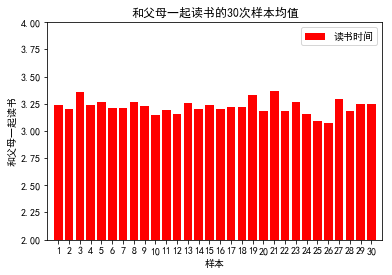

In [88]:
datas = np.arange(len(read.values())) 
fig, ax = plt.subplots()
rects1 = ax.bar(datas, read.values(),color='red' ,label='读书时间')
ax.set_xlabel('样本')
ax.set_ylabel('和父母一起读书')
ax.set_title('和父母一起读书的30次样本均值')
ax.set_xticks(datas)
ax.set_xticklabels(range(1,31))
ax.legend()
ax.set_ylim(2,4)
ax.set_xlim(-1,30)

(-1, 30)

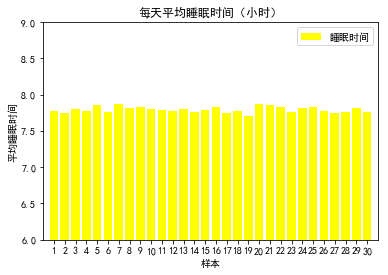

In [89]:
datas = np.arange(len(sleep.values())) 
fig, ax = plt.subplots()
rects1 = ax.bar(datas, sleep.values(),color='yellow', label='睡眠时间')
ax.set_xlabel('样本')
ax.set_ylabel('平均睡眠时间')
ax.set_title('每天平均睡眠时间（小时）')
ax.set_xticks(datas)
ax.set_xticklabels(range(1,31))
ax.legend()
ax.set_ylim(6,9)
ax.set_xlim(-1,30)

In [71]:
rdata = []
for i in read.values():
    rdata.append(i)
sdata = []
for i in sleep.values():
    sdata.append(i)

sample_data = {'和父母一起读书时间':rdata,'每天平均睡眠时间':sdata}
frame = pd.DataFrame(sample_data,index=range(1,31))
print('\n样本均值：')
print(frame.mean())
print('\n样本标准误：')
print(frame.std())


样本均值：
和父母一起读书时间    3.222635
每天平均睡眠时间     7.794664
dtype: float64

样本标准误：
和父母一起读书时间    0.066563
每天平均睡眠时间     0.040371
dtype: float64


### 回归分析

+ 请从CEPS.csv数据里挑选若干变量建立回归方程，要求至少三个自变量
    + 如，学生的学业成绩受认知水平、家庭收入的影响
    + 考虑因变量和自变量间的实质关系，变量间关系应该是有意义
    + 选择自变量时，注意变量的类型，如果是分类变量，需要进行编码
+ 请报告回归方程的结果，需要包括：
    + 模型拟合指标
    + 模型的显著性检验结果
    + 变量的系数
    + 各系数的显著性检验结果
    + 对模型结果的解释
    

In [73]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [74]:
sentinels = {'c1001': [' '], 'c1101': [' '],'c12': [' '],'c1301': [' '],'c25': [' ']}
df = pd.read_csv('G:/python/mydemo/CEPS.csv',encoding='gb2312', na_values=sentinels)

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,196,199,221,222,223,224,251,252,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [77]:
# c1011 六年级时数学吃力程度  x1
# c1101 目前数学吃力程度     x2
# c1301 未来数学的帮助       x3
# c25   对未来的信心         x4
# c12   目前的成绩           y
data = pd.DataFrame({'x1':df.c1001,'x2':df.c1101,'x3':df.c1301,'x4':df.c25,'y':df.c12})
data = data.dropna(axis=0,how='any')

In [87]:
x_var = ['x1','x2','x3','x4']
X = data.loc[ :,x_var].values
Y = data['y'].values
const = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())
print('\n变量系数:')
print(results.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 4.506e+04
Date:                Sun, 30 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:22:12   Log-Likelihood:                -27212.
No. Observations:               19073   AIC:                         5.443e+04
Df Residuals:                   19069   BIC:                         5.446e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1696      0.008     20.778      0.0

### 分析
+ 对模型的解释
    + 模型拟合指标:
        + 因变量：
            + Y : 目前学生成绩在班级中的水准
        + 自变量：
            + x1：六年级时学习数学的吃力程度
            + x2：目前学习数学的吃力程度
            + x3：数学对未来的帮助程度
            + x4：对未来的信心
    + 模型的显著性检验结果：
        + R-squared=0.904 ，模型拟合效果较好
    + 变量的系数:
        + x1：0.16963561
        + x2：0.36255657
        + x3：0.13311594
        + x4：0.40081011
    + 各系数的显著性检验结果：
        + P值都接近0，说明模型的自变量对因变量有显著影响
    + 对模型结果的解释：
        学生目前的成绩状况主要取决于对未来的信心，其次是目前对数学的学习状况、以前的学习状况以及数学对未来的帮组。